### Upload the dataset from github.

In [ ]:
!wget "https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202012-2016%20Training%20-%20stocks2012-2016.csv"
!wget "https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202017%20Test%20-%20stocks2017.csv"

--2020-10-27 08:56:46--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202012-2016%20Training%20-%20stocks2012-2016.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67529 (66K) [text/plain]
Saving to: ‘Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv’

Uniqlo(FastRetailin 100%[===================>]  65.95K  --.-KB/s    in 0.02s   

2020-10-27 08:56:46 (4.13 MB/s) - ‘Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv’ saved [67529/67529]

--2020-10-27 08:56:46--  https://raw.githubusercontent.com/UpXDataScience/FA-Bootcamp/master/Day4/Uniqlo(FastRetailing)%202017%20Test%20-%20stocks2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 

### Importing the packages.

In [ ]:
import pandas as pd                              # Package to manipulate dataframe
import matplotlib.pyplot as plt                  # Visualization package
import numpy as np                               # Numeric computing

### Reading the dataset

In [ ]:
df=pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")          # Reading the training data

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


We required only two columns, Date and Close. Since Close is the input and output. And Date will become index.

In [ ]:
cols=['Date','Close']
stocks_df=df[cols]                                                                            # new_df contains only the required columns
stocks_df.head()

,Date,Close
0,2016-12-30,41830
1,2016-12-29,42660
2,2016-12-28,43270
3,2016-12-27,43620
4,2016-12-26,43340


### Exploring the data

In [ ]:
stocks_df.info()                                                                             # Checking the missing values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1226 non-null   object
 1   Close   1226 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


The date column is an object. Let's convert it to datetime.

In [ ]:
stocks_df['Date']=pd.to_datetime(stocks_df['Date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1226 non-null   datetime64[ns]
 1   Close   1226 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.3 KB


Setting the date column as index.

In [ ]:
stocks_df=stocks_df.set_index("Date")

In [ ]:
stocks_df.head()

,Close
Date,
2016-12-30,41830
2016-12-29,42660
2016-12-28,43270
2016-12-27,43620
2016-12-26,43340


In [ ]:
stocks_df.tail()

,Close
Date,
2012-01-11,14590
2012-01-10,14390
2012-01-06,13850
2012-01-05,13800
2012-01-04,13720


Our data starts from 4th January 2012 to 30th December 2016

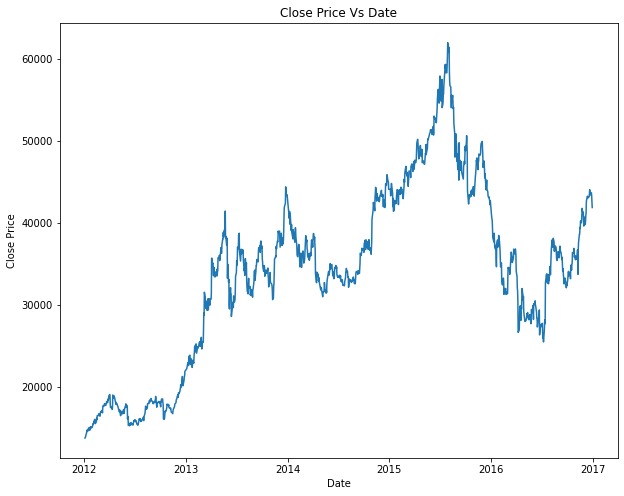

In [ ]:
plt.figure(figsize=[10,8])                                   # Setting the figure size
plt.plot(stocks_df['Close'])                                 # Plotting the close price
plt.xlabel("Date")                                           # Setting the label in x-axis
plt.ylabel("Close Price")                                    # Setting the label in y-axis
plt.title("Close Price Vs Date")                             # Title
plt.show()

### Importing more packages for prediction.

In [ ]:
from keras.models import Sequential                   # Sequential model
from keras.layers import Dense                        # For fully connected layers
from keras.layers import LSTM                         # For LSTM layers
from sklearn.preprocessing import MinMaxScaler        # Scaling the data
min_max_scaler = MinMaxScaler()

In [ ]:
len(stocks_df)

1226

In [ ]:
stocks_df.isnull().sum()  

Close    0
dtype: int64

### Train Test Split

Let's make prediction for 30 days.

In [ ]:
prediction_days = 30
ts_train= stocks_df[prediction_days:]       # Remove 30 days from the end for Training data
ts_test= stocks_df[:prediction_days]        # Last 30 days values for test

In [ ]:
ts_train.shape   

(1196, 1)

In [ ]:
ts_test.shape    

(30, 1)

In [ ]:
ts_test.tail()

,Close
Date,
2016-11-24,41730
2016-11-22,40360
2016-11-21,39970
2016-11-18,40190
2016-11-17,39280


In [ ]:
# Scaling the train data

training_set=ts_train.values
training_set = min_max_scaler.fit_transform(training_set)

Defining our X and y  <br>
**X is our inputs which is the training data.  <br>
y is the output, which is training data shifted by 1.**   <br>

For a given day, we want to predict the stock value for the next day.

In [ ]:
x_train=training_set[0:len(training_set)-1]
y_train=training_set[1:len(training_set)]

In [ ]:
x_train[:5]                                                  # Checking the first 5 rows of the scaled training data

array([[0.53266957],
       [0.51545323],
       [0.51566065],
       [0.49533292],
       [0.48060568]])

In [ ]:
y_train[:5]                                                  # Checking the first 5 rows of the scaled test data

array([[0.51545323],
       [0.51566065],
       [0.49533292],
       [0.48060568],
       [0.41402199]])

In [ ]:
len(x_train)                                                 # We should have same number of records in x_train and y_train

1195

In [ ]:
len(y_train)

1195

### Building the model

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 1, 1))          # We need to reshape the data before it is passed to the model

In [ ]:
num_units = 32
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 50

In [ ]:
# Training the data from 4-01-2012 to 16-11-2016

regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 2/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 3/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 4/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 5/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 6/50
239/239 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7/50
239/239 [==============================] - 0s 1ms/step - loss: 4.3693e-04
Epoch 8/50
239/239 [==============================] - 0s 1ms/step - loss: 3.2490e-04
Epoch 9/50
239/239 [==============================] - 0s 1ms/step - loss: 3.1943e-04
Epoch 10/50
239/239 [==============================] - 0s 1ms/step - loss: 3.1834e-04
Epoch 11/50
239/239 [==============================] - 0s 1ms/step - loss: 3.1705e-04
Epoch 12/50
239/239 [==============================] - 0s 1ms/step - loss: 3.2105e-04
E

###  Prediction on ts_test 

In [ ]:
# We are going to make prediction from 17-11-2016 to 30-12-2016

# Preprocess the test data

test_set = ts_test.values

inputs = np.reshape(test_set, (len(test_set), 1))                        # Reshape before passing in the input
inputs = min_max_scaler.transform(inputs)                                # Scaling the data
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)                              # Make predictions on the test data
predicted_price = min_max_scaler.inverse_transform(predicted_price)      # Inverse transform the predicted price

In [ ]:
# This is the close price of stocks for 30 days

predicted_price     

array([[41896.156],
       [42721.195],
       [43326.684],
       [43673.754],
       [43396.12 ],
       [43534.957],
       [44050.28 ],
       [43673.754],
       [43187.79 ],
       [43187.79 ],
       [43058.777],
       [43148.094],
       [43267.16 ],
       [43187.79 ],
       [42651.664],
       [41169.45 ],
       [40940.28 ],
       [40222.297],
       [39833.023],
       [40730.96 ],
       [40531.535],
       [39643.28 ],
       [40272.184],
       [41328.81 ],
       [41438.348],
       [41796.668],
       [40431.8  ],
       [40042.66 ],
       [40262.207],
       [39353.566]], dtype=float32)

In [ ]:
error=predicted_price-test_set                                           # Calculate the error

In [ ]:
# Lets have a look at the error values

error

array([[66.15625   ],
       [61.1953125 ],
       [56.68359375],
       [53.75390625],
       [56.12109375],
       [54.95703125],
       [50.28125   ],
       [53.75390625],
       [57.7890625 ],
       [57.7890625 ],
       [58.77734375],
       [58.09375   ],
       [57.16015625],
       [57.7890625 ],
       [61.6640625 ],
       [69.44921875],
       [70.28125   ],
       [72.296875  ],
       [73.0234375 ],
       [70.9609375 ],
       [71.53515625],
       [73.28125   ],
       [72.18359375],
       [68.80859375],
       [68.34765625],
       [66.66796875],
       [71.80078125],
       [72.66015625],
       [72.20703125],
       [73.56640625]])

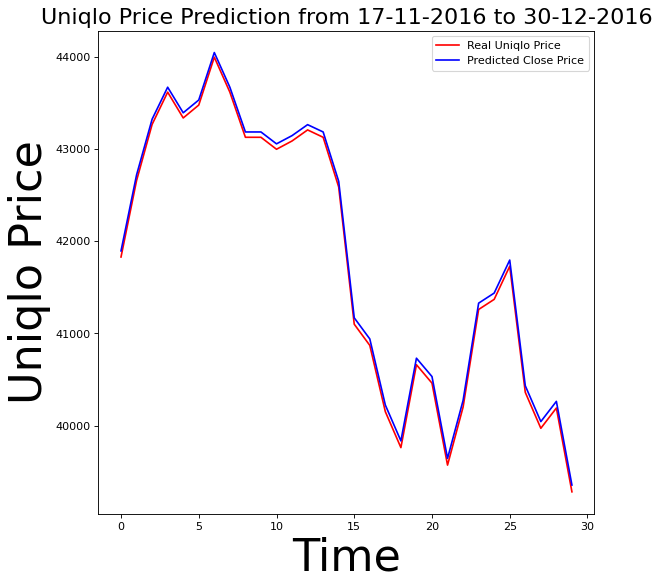

In [ ]:
# Plot the Actual price and the predicted price

plt.figure(figsize=(8, 8), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real Uniqlo Price')                      # Actual Price
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted Close Price')      # Predicted Price

plt.title('Uniqlo Price Prediction from 17-11-2016 to 30-12-2016', fontsize = 20)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Uniqlo Price', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

### Prediction with test data

In [ ]:
test_data=pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")              # Loading the test data

In [ ]:
test_data

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


This has data for 7 days from 4-01-2017 to 13-1-2017

Extracting all the rows and 4th column

In [ ]:
test_data1=test_data.iloc[:,4]                                                         # Extracting the close price
test_data1

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

We need to perform feature engineering on the test price before we can make predictions from the model.

In [ ]:
test_data1=np.array(test_data1)

In [ ]:
test_data1 =test_data1.reshape(-1,1) 

In [ ]:
test_input=min_max_scaler.transform(test_data1) 

In [ ]:
test_input.shape

(7, 1)

In [ ]:
test_input=np.reshape(test_input, (len(test_input), 1, 1))

In [ ]:
test_prediction=regressor.predict(test_input)                          # Make predictions for the test data

In [ ]:
test_prediction=min_max_scaler.inverse_transform(test_prediction)      # Inverse transform the predictions

In [ ]:
test_prediction

array([[38503.65 ],
       [38083.285],
       [38633.703],
       [38763.74 ],
       [39793.08 ],
       [42651.664],
       [43346.527]], dtype=float32)

In [ ]:
test_data.iloc[:,4]

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64